# Deep learning 2. Convolutional Neural Networks

- The dense FFN used before contained 600000 parameters. These are expensive to train!
- A picture is not a flat array of numbers, it is a 2D matrix with multiple color channels. Convolution kernels are able to find 2D hidden features.
- A CNN's layers are operating on a 3D tensor of shape (height, width, channels). A colored imaged usually has three channels (RGB) but more are possible. We have grayscale thus only one channel.
- The width and height dimensions tend to shrink as we go deeper in the network. Why? NNs are efective information filters.

Why is this important for a biologist?
- Sight is our main sense. Labelling pictures is much easier than other types of data!
- Most biological data can be converted to image format. (including genomics, transcriptomics, etc)
- Spatial transcriptomics, as well as some single cell data have multi-channel and spatial features. 
- Microscopy is biology too!

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [3]:
print(train_images.shape)

(60000, 28, 28, 1)

### Method:

- The convolutional network will filter the image in a sequence, gradually expanding the complexity of hidden features and eliminating the noise via the "downsampling bottleneck".
- A CNN's filtering principle is based on the idea of functional convolution, this is a mathematical way of comparing two functions in a temporal manner by sliding one over the other.
- Parts: convolution, pooling and classification

In [13]:
from IPython.display import Image
Image(url= "../img/cnn.png", width=400, height=400)

In [11]:
Image(url= "../img/convolution.png", width=400, height=400)

In [12]:
Image(url= "../img/pooling.png", width=400, height=400)

The layers:
- The first block: 32 number of kernels (convolutional filters) each of 3 x 3 size followed by a max pooling operation with pool size of 2 x 2.
- The second block: 64 number of kernels each of 3 x 3 size followed by a max pooling operation with pool size of 2 x 2 and a dropout of 20% to ensure the regularization and thus avoiding overfitting of the model.
- classification block: flattening operation which transforms the data to 1 dimensional so as to feed it to fully connected or dense layer. The first dense layer consists of 128 neurons with relu activation while the final output layer consist of 10 neurons with softmax activation which will output the probability for each of the 10 classes.


In [2]:
#from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import models

model = models.Sequential()

# first block
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# second block
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# flattening followed by dense layer and final output layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

- Loss:
    - Many functions are possible (mean square error, maximum likelihood)
    - cross-entropy loss (or log loss): sum for all predicted classes $- \sum_c y_c log(p_c)$, where $y_c$ is a binary inndication of classification success and $p_c$ is the probability value of the model prediction


- Optimizers:
    - SGD: slower, classic, can get stuck in local minima, uses momentum to avoid small valleys
    - rmsprop (root mean square propagation): batches contain bias noise, weights are adjusted ortogonal to bias, leading to faster convergence.
    - Adam: combines the above
    - Read more at: https://medium.com/analytics-vidhya/momentum-rmsprop-and-adam-optimizer-5769721b4b19


- Learning rate ($\alpha$): Gradient descent algorithms multiply the magnitude of the gradient (the rate of error change with respect to each weight) by a scalar known as learning rate (also sometimes called step size) to determine the next point. $w_{ij} = w_{ij} + \alpha \frac{dE}{dw_{ij}}$


In [3]:
from tensorflow.keras.optimizers import Adam

# compiling the model
model.compile(loss='categorical_crossentropy',  optimizer=Adam(lr=0.01), metrics=['accuracy'])

# train the model training dataset
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels), batch_size=128)

# save the model
model.save('cnn.h5')

Epoch 1/5
469/469 [==============================] - 25s 54ms/step - loss: 0.1480 - accuracy: 0.9551 - val_loss: 0.0514 - val_accuracy: 0.9853
Epoch 2/5
469/469 [==============================] - 25s 54ms/step - loss: 0.0620 - accuracy: 0.9810 - val_loss: 0.0436 - val_accuracy: 0.9863
Epoch 3/5
469/469 [==============================] - 26s 55ms/step - loss: 0.0571 - accuracy: 0.9824 - val_loss: 0.0452 - val_accuracy: 0.9864
Epoch 4/5
469/469 [==============================] - 25s 54ms/step - loss: 0.0477 - accuracy: 0.9852 - val_loss: 0.0398 - val_accuracy: 0.9879
Epoch 5/5
469/469 [==============================] - 25s 54ms/step - loss: 0.0445 - accuracy: 0.9863 - val_loss: 0.0647 - val_accuracy: 0.9845


In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0647 - accuracy: 0.9845
0.06469543278217316 0.984499990940094


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


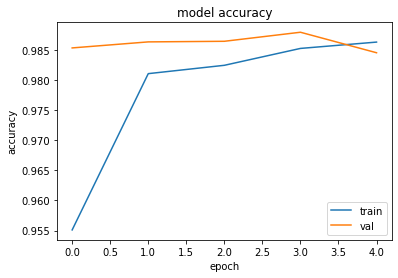

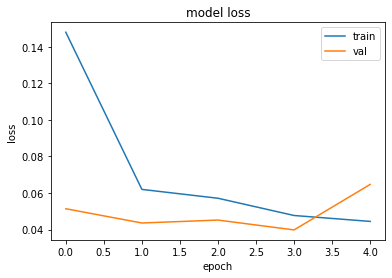

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
print(history.history.keys())
#  Ploting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()
# Ploting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

### Good fit vs overfitting and underfitting

- Good fit:
    - Training loss and Validation loss are close to each other with validation loss being slightly greater than the training loss.
    - Initially decreasing training and validation loss and a pretty flat training and validation loss after some point till the end.


- Overfitting: Overfit models are similar to school kids that spend so much time learning that they are not able to generalize their knowledge, or hyperspecialists that cannot think outside their fields. If a model is over trained on the data it typically shows a perfect training set score and a gradually worsening test score. This is because it learned so much the training data noise that it fails to spot the signal in the test data. Can you spot above when the model overfits?
    - How to avoid: Don't use complex models for small simple datasets. Regularization.
    - How to spot:
        - Training loss and Validation loss are far away from each other.
        - Gradually decreasing validation loss (without flattening) upon adding training examples.
        - Very low training loss that’s very slightly increasing upon adding training examples.


- Underfitting: The model doesn't learn from the data, giving a low score on both the training set and test/validation set.
    - How to avoid: Don't use simple models for a complex problem. Clean the noise from the dataset so that the signal is easier to capture by the model. (It may also be that the signal is missing or is misslabeled)
    - How to spot:
        - Increasing training loss upon adding training examples.
        - Training loss and validation loss are close to each other at the end.
        - Sudden dip in the training loss and validation loss at the end (not always).


- This is a general ML problem, read here how you can use scikit learn to evaluare the loss/acc curves for any iterative learning algorithm:
https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5


### How do we improve model convergence?

- Epochs: increase the number until the validation accuracy starts to decrease, even when the accuracy of the training data continues to increase (this is when we detect a potential overfitting).
- Batches: A small number of samples per batch will avoid RAM issues.
- Learning rate: if too big, the algorithm might converge fast to a local minimum, or bounce on the gradient well. If too small the convergence will be slower but better.
- Choice of optimization methods and their parameters. (there are drawbacks to all)
- Hyperparametrization. Note that there are also model specific hyper-parameters. Can you find them in this case (CNN)?

Further read:
- https://towardsdatascience.com/learning-process-of-a-deep-neural-network-5a9768d7a651

**Task:** now retrain the model with a batch size of 32, 10 epochs, and no learning rate constraints (use defaults). Notice improvements in model fitting?


### Regularization

- Large datasets cause overfitting! A common reason is having large weights in the network. They can result in small changes in the input having drastic effects in the output. More generally, you want to insure that your model is able to keep up with a certain level of input noise.
- Regularization is a general ML problem, but in the NN context the main approaches are batch normalization and dropout layers.

**Batch normalization**: normalize the inputs of each layer in such a way that, they have a mean activation output zero and a unit standard deviation.
- This reduces the eliptical curvature of the error surface, helping gradient descent.
- Since the normalization is only done batch wise, the normalization layers will still feed regular noise in the model!

**Dropout**
- By popular vote: A healthy mind is a mind that can forget.
- A single model can be used to simulate having a large number of different network architectures by randomly dropping out nodes during training.
- This makes the neurons less reliant on small perturbations from other neurons.

**Task:**
- apply a batch normalization layer
- parametrise the dropout rate and measure loss.


Further read:
- https://medium.com/analytics-vidhya/everything-you-need-to-know-about-regularizer-eb477b0c82ba
- https://www.analyticsvidhya.com/blog/2021/03/introduction-to-batch-normalization/